# ДЗ4 оцениваемое

## Задание №1

##### 1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

##### 2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

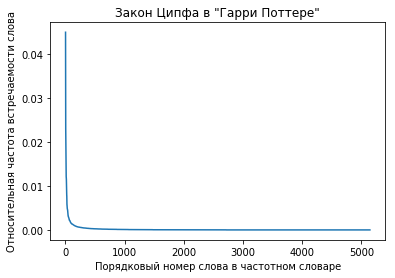

In [30]:
#читаем текст
import os
os.chdir('C:/Users/USER 2/Documents/lit') 
with open('harry_potter.txt', 'r', encoding='cp1251') as f: 
    text = f.read()

#убираем пунктуацию
punct = "!\"#$%&()*+,./:;<=>?@[\]^_`{|}~„“«»†*—/"
tex = []
for word in text:
    word = word.strip(punct)
    tex.append(word)
tex = ''.join(tex)

#приводим к нижнему регистру
tex = tex.lower()

#лемматизируем
import nltk
from nltk.tokenize import word_tokenize
tex = word_tokenize(tex)
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
lem = []
for word in tex:
    lemm = wnl.lemmatize(word, pos='n')
    lemm = wnl.lemmatize(word, pos='v')
    lem.append(lemm)
tex = ' '.join(lem)

#записываем в новый файл
with open('harry_potter_lem', 'w', encoding='cp1251') as g:
    g.write(tex)

#проверяем на выполнение закона Ципфа
##получаем словарь, в котором каждому слову ставится в соответствие частота его употребления (относительная)
tex = word_tokenize(tex)
num = {}
for word in tex:
    num[word] = tex.count(word) / len(tex)

##получаем из словаря отсортированный по количеству употреблений слов (от большего к меньшему) список
sorted_num = sorted(num.items(), key = lambda x: x[1], reverse = True)

##указывааем координаты для построения графика
X = [i for i in range(1, len(num)+1)]
Y = []
for x in sorted_num:
    Y.append(x[1])

#рисуем график
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, Y)
plt.xlabel("Порядковый номер слова в частотном словаре")
plt.ylabel("Относительная частота встречаемости слова")
plt.title('Закон Ципфа в "Гарри Поттере"')
plt.show()

##### 3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

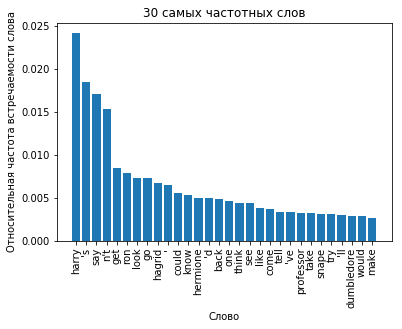

In [31]:
#очищаем текст от стоп-слов
from nltk.corpus import stopwords
stop = stopwords.words('english')
num = {}
for word in tex:
    if word in stop: 
        tex.remove(word)
    else:
        num[word] = tex.count(word) / len(tex)
sorted_num = sorted(num.items(), key = lambda x: x[1], reverse = True)
Y = []
for x in sorted_num:
    Y.append(x[1])

#строим столбцовую диаграмму
X1 = [i for i in range(0, 30)]
Y1 = Y[:30]
plt.xticks(X1, [x[0] for x in sorted_num[:30]], rotation=90)
plt.bar(X1, Y1)
plt.xlabel("Слово")
plt.ylabel("Относительная частота встречаемости слова")
plt.title("30 самых частотных слов")
plt.show()